In [1]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

In [3]:
df_oneday = pd.read_csv("관광_당일여행_동반자_유형__중복응답__20240520014137.csv", encoding='utf-8')
df_moreday = pd.read_csv("관광_숙박여행_동반자_유형__중복응답__20240520014059.csv", encoding='utf-8')

In [4]:
#연령대별, 성별, 직업별, 숙박/당일 동반 유형 분포 (2019-2022)

## 당일여행 동반자 유형 분석

### 기본 데이터

In [5]:
df_oneday

,시점,통계분류(1),통계분류(2),가족(부모 배우자 자녀 형제),친구/연인,친목 단체/모임(동호회 종교단체 등),(직장)동료,친척,학교 단체(소풍 수학여행 등),기타
0,2019,전체,소계,49.6,41.7,6.6,2.2,2.0,0.3,0.3
1,2019,성별,남자,51.0,40.8,6.0,2.7,2.0,0.4,0.3
2,2019,성별,여자,48.3,42.5,7.2,1.7,2.1,0.2,0.3
3,2019,연령,15~19세,34.9,58.8,1.3,0.2,1.5,4.4,0.2
4,2019,연령,20대,16.6,80.7,0.7,1.7,0.7,0.2,0
...,...,...,...,...,...,...,...,...,...,...
119,2022,가구소득,200~300만원 미만,44.1,48.9,5.2,2.6,2.3,0.1,-
120,2022,가구소득,300~400만원 미만,55.7,40.2,3.2,2.2,1.5,-,-
121,2022,가구소득,400~500만원 미만,59.6,37.1,2.3,2,1.2,0.4,-
122,2022,가구소득,500~600만원 미만,55.8,42.1,1.6,1.7,1.1,0.1,-


In [6]:
df_oneday["통계분류(1)"].unique()

array(['전체', '성별', '연령', '직업', '학력', '가구원수', '가구소득'], dtype=object)

In [7]:
df_oneday["통계분류(2)"].unique()

array(['소계', '남자', '여자', '15~19세', '20대', '30대', '40대', '50대', '60대',
       '70세 이상', '임금봉급근로자', '고용원있는사업주', '고용원없는자영업자', '무급가족 종사자', '전업주부',
       '학생', '기타', '초졸 이하', '중학교', '고등학교', '대학교이상', '1인', '2인', '3인이상',
       '100만원 미만', '100~200만원 미만', '200~300만원 미만', '300~400만원 미만',
       '400~500만원 미만', '500~600만원 미만', '600만원 이상'], dtype=object)

In [8]:
df_oneday['시점'] = df_oneday['시점'].astype(str)
df_oneday.dtypes

시점                       object
통계분류(1)                  object
통계분류(2)                  object
가족(부모 배우자 자녀 형제)        float64
친구/연인                   float64
친목 단체/모임(동호회 종교단체 등)    float64
(직장)동료                   object
친척                      float64
학교 단체(소풍 수학여행 등)         object
기타                       object
dtype: object

### 성별별 동반자 유형 분석

In [9]:
df_gender = df_oneday[df_oneday["통계분류(1)"]=="성별"]
df_gender

,시점,통계분류(1),통계분류(2),가족(부모 배우자 자녀 형제),친구/연인,친목 단체/모임(동호회 종교단체 등),(직장)동료,친척,학교 단체(소풍 수학여행 등),기타
1,2019,성별,남자,51.0,40.8,6.0,2.7,2.0,0.4,0.3
2,2019,성별,여자,48.3,42.5,7.2,1.7,2.1,0.2,0.3
32,2020,성별,남자,50.0,42.5,2.9,5.6,2.3,0,0.1
33,2020,성별,여자,50.8,44.9,2.5,1.9,3.0,0,0.1
63,2021,성별,남자,56.2,39.6,1.1,4,1.6,-,-
64,2021,성별,여자,53.9,44.0,1.1,1.4,2.4,0,-
94,2022,성별,남자,54.1,40.9,3.2,3.3,1.2,0.2,-
95,2022,성별,여자,51.3,45.7,2.7,1.1,1.7,0,-


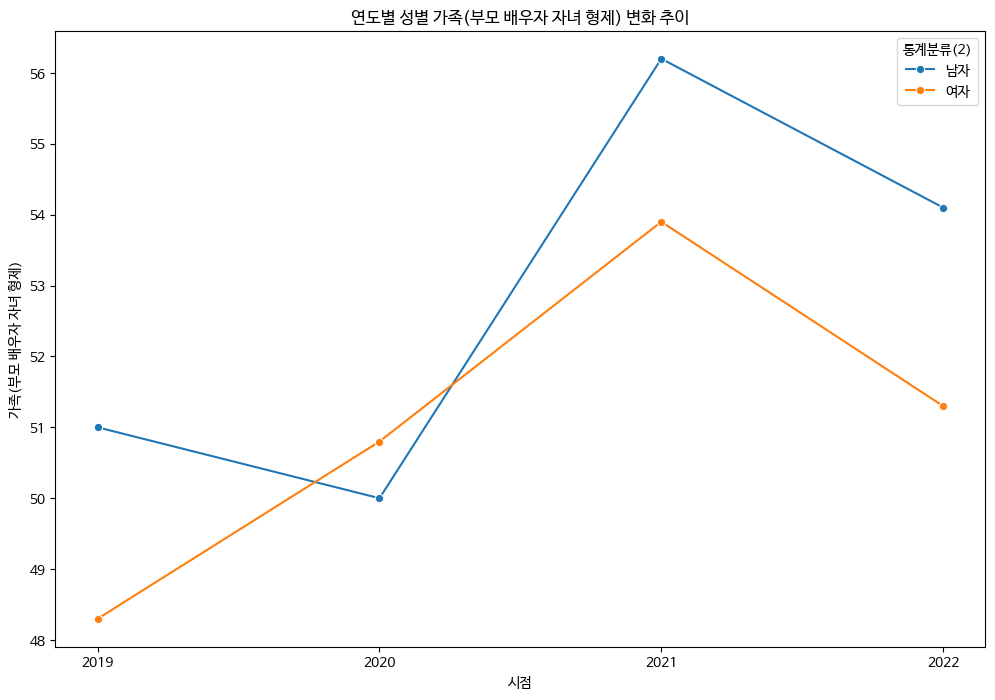

In [10]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_gender, x='시점', y='가족(부모 배우자 자녀 형제)', hue='통계분류(2)', marker='o')
plt.title('연도별 성별 가족(부모 배우자 자녀 형제) 변화 추이')
plt.show()

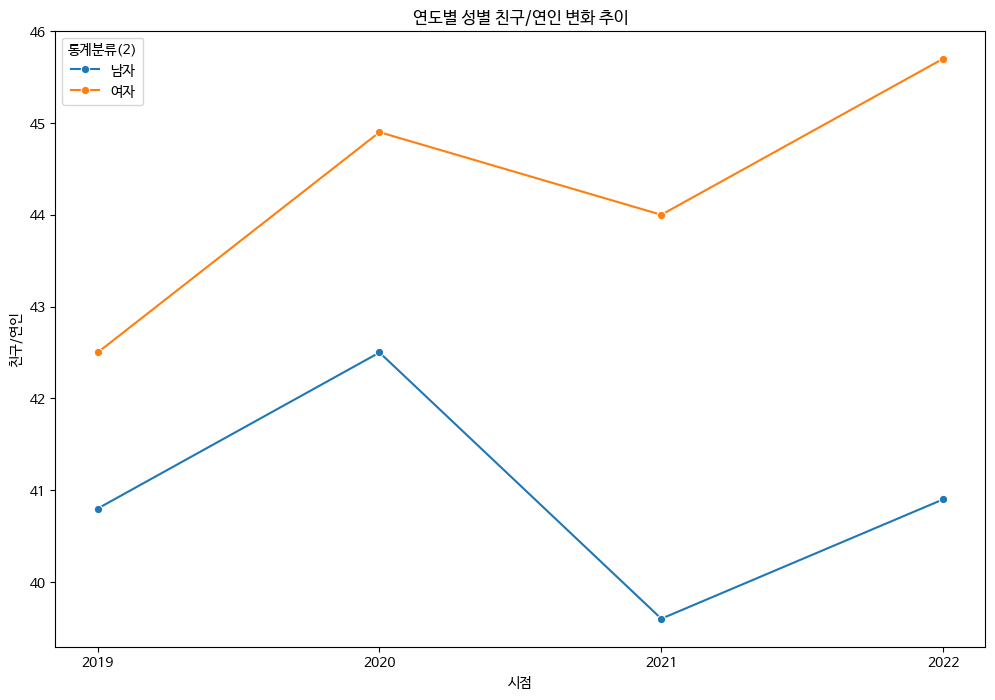

In [11]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_gender, x='시점', y='친구/연인', hue='통계분류(2)', marker='o')
plt.title('연도별 성별 친구/연인 변화 추이')
plt.show()

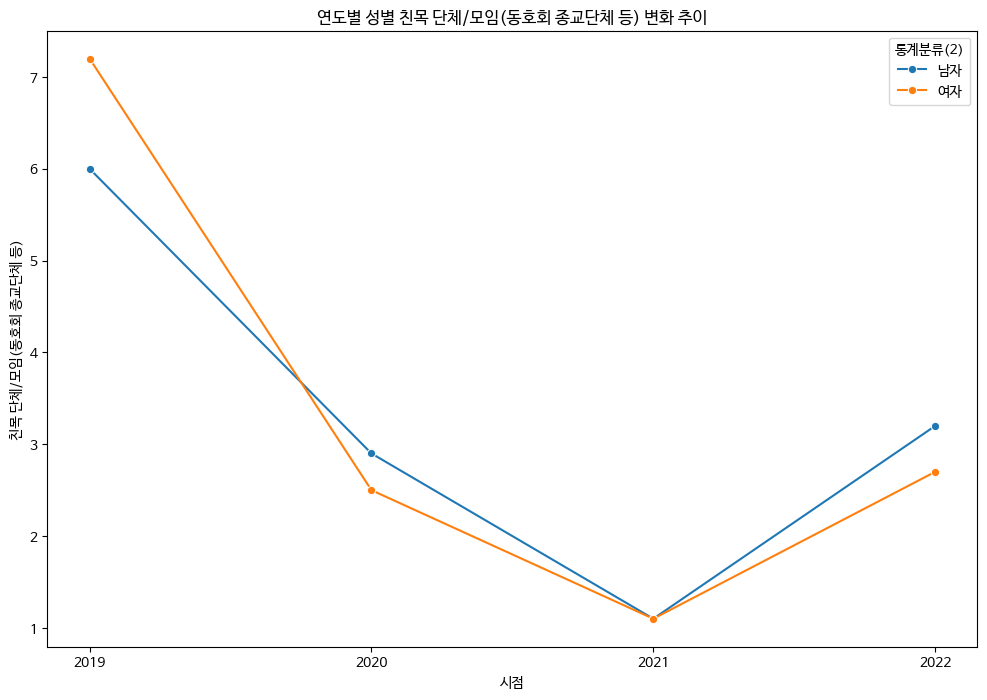

In [12]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_gender, x='시점', y='친목 단체/모임(동호회 종교단체 등)', hue='통계분류(2)', marker='o')
plt.title('연도별 성별 친목 단체/모임(동호회 종교단체 등) 변화 추이')
plt.show()

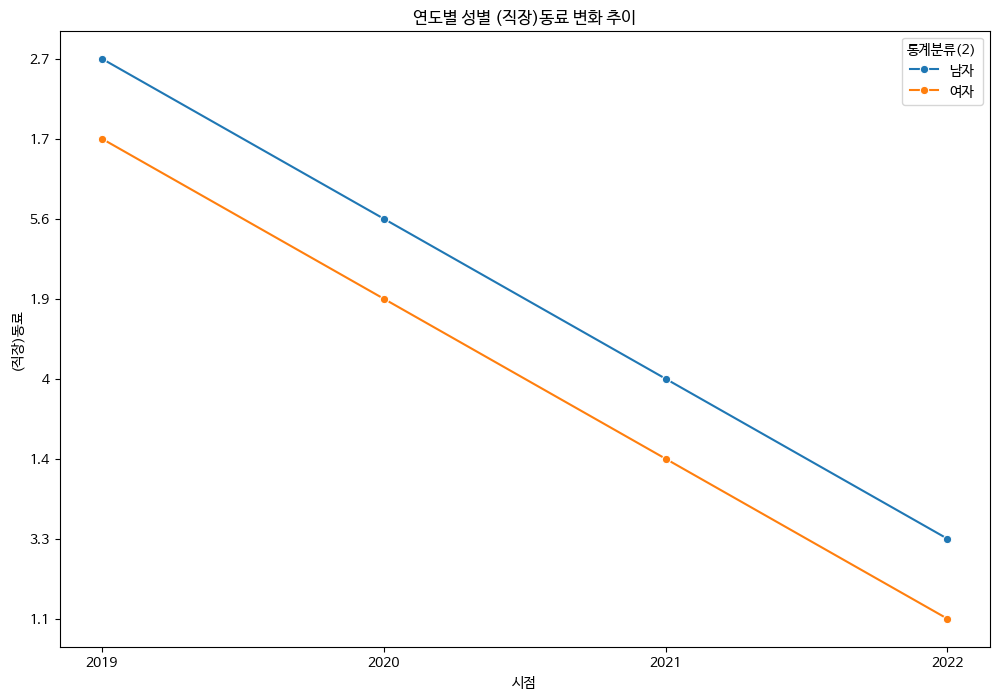

In [13]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_gender, x='시점', y='(직장)동료', hue='통계분류(2)', marker='o')
plt.title('연도별 성별 (직장)동료 변화 추이')
plt.show()

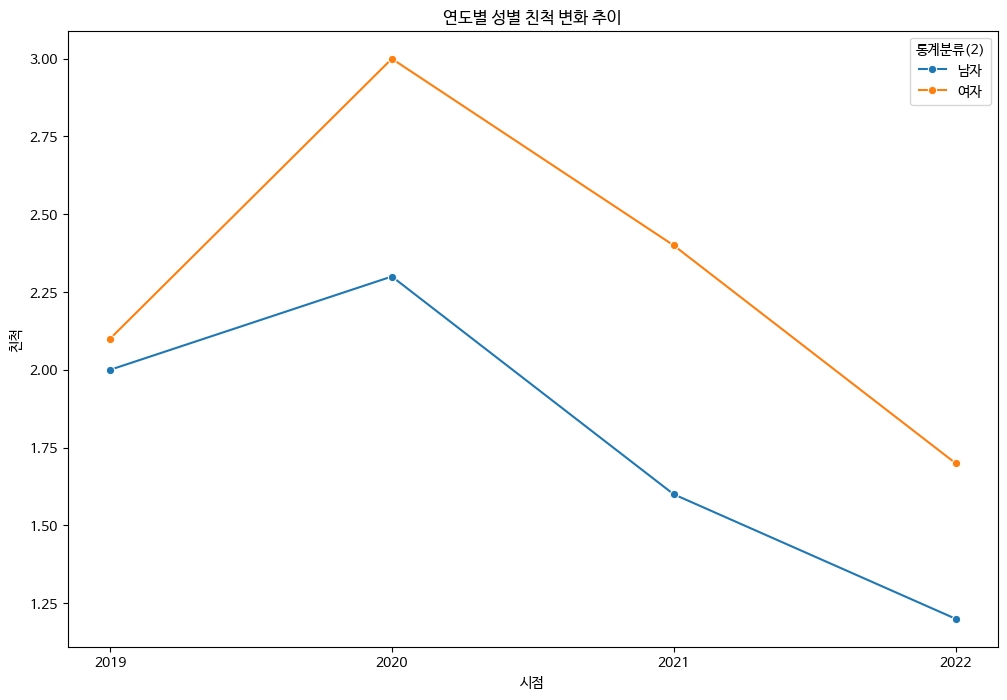

In [14]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_gender, x='시점', y='친척', hue='통계분류(2)', marker='o')
plt.title('연도별 성별 친척 변화 추이')
plt.show()

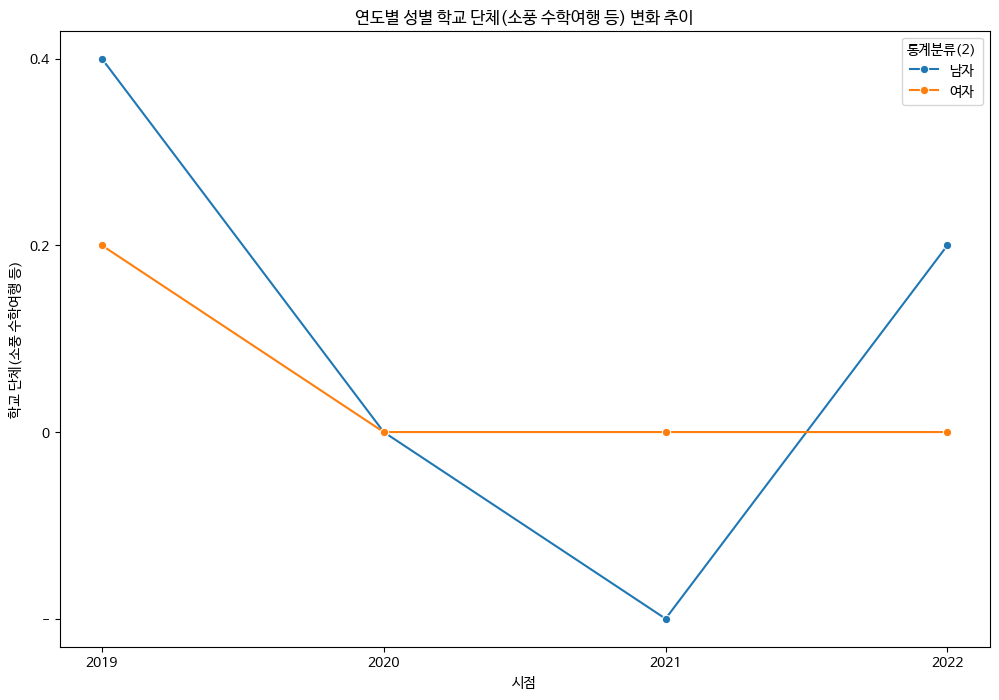

In [15]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_gender, x='시점', y='학교 단체(소풍 수학여행 등)', hue='통계분류(2)', marker='o')
plt.title('연도별 성별 학교 단체(소풍 수학여행 등) 변화 추이')
plt.show()

### 연령대별 동반자 유형 분석

In [16]:
df_age = df_oneday[df_oneday["통계분류(1)"]=="연령"]
df_age.head()

,시점,통계분류(1),통계분류(2),가족(부모 배우자 자녀 형제),친구/연인,친목 단체/모임(동호회 종교단체 등),(직장)동료,친척,학교 단체(소풍 수학여행 등),기타
3,2019,연령,15~19세,34.9,58.8,1.3,0.2,1.5,4.4,0.2
4,2019,연령,20대,16.6,80.7,0.7,1.7,0.7,0.2,0
5,2019,연령,30대,58.2,39.1,0.8,2.2,0.9,-,0.1
6,2019,연령,40대,66.0,27.1,3.0,3.8,2.0,0.1,0.5
7,2019,연령,50대,54.0,34.2,10.3,3,2.6,-,0.2


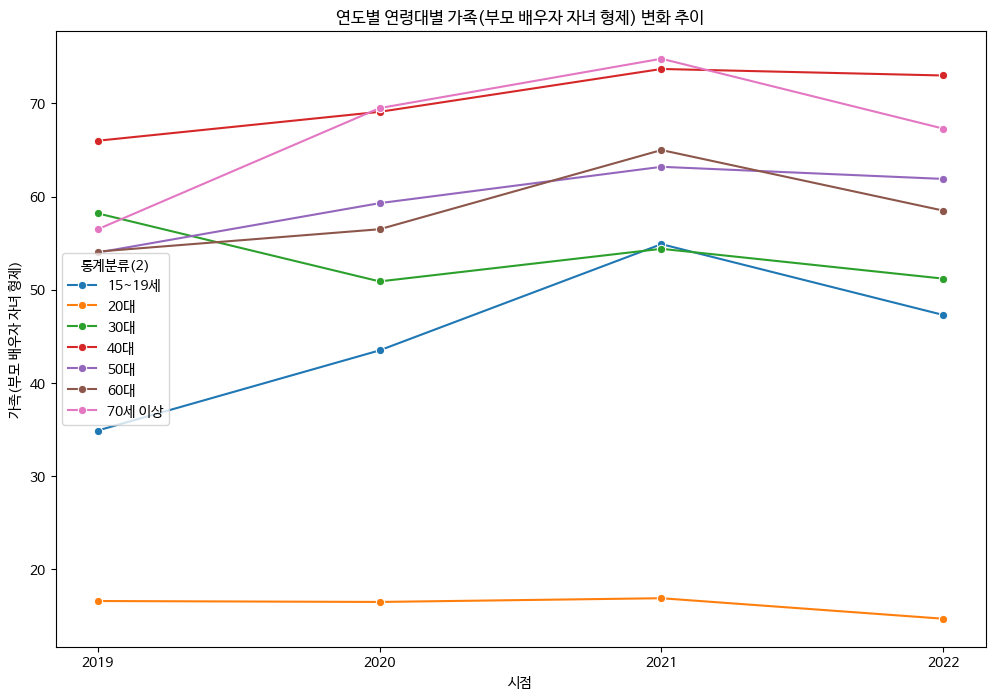

In [17]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_age, x='시점', y='가족(부모 배우자 자녀 형제)', hue='통계분류(2)', marker='o')
plt.title('연도별 연령대별 가족(부모 배우자 자녀 형제) 변화 추이')
plt.show()

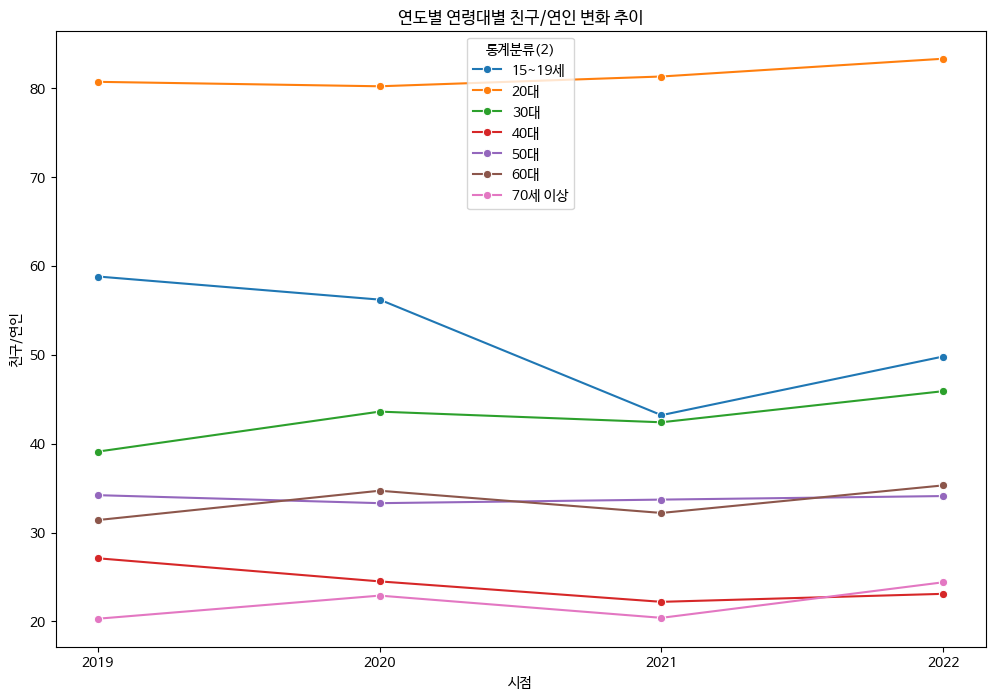

In [18]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_age, x='시점', y='친구/연인', hue='통계분류(2)', marker='o')
plt.title('연도별 연령대별 친구/연인 변화 추이')
plt.show()

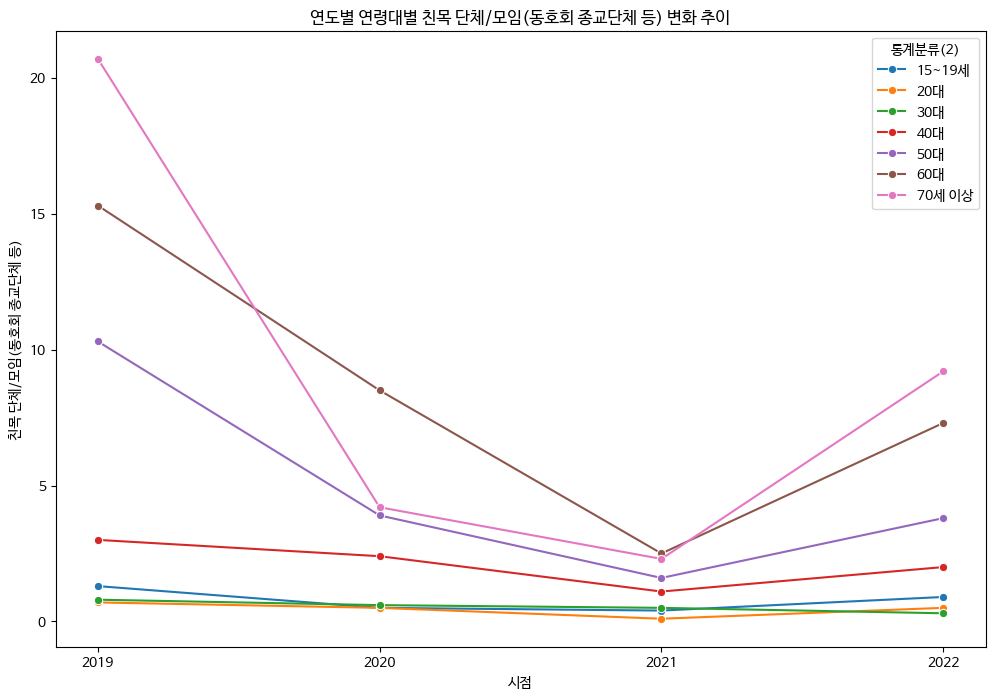

In [19]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_age, x='시점', y='친목 단체/모임(동호회 종교단체 등)', hue='통계분류(2)', marker='o')
plt.title('연도별 연령대별 친목 단체/모임(동호회 종교단체 등) 변화 추이')
plt.show()

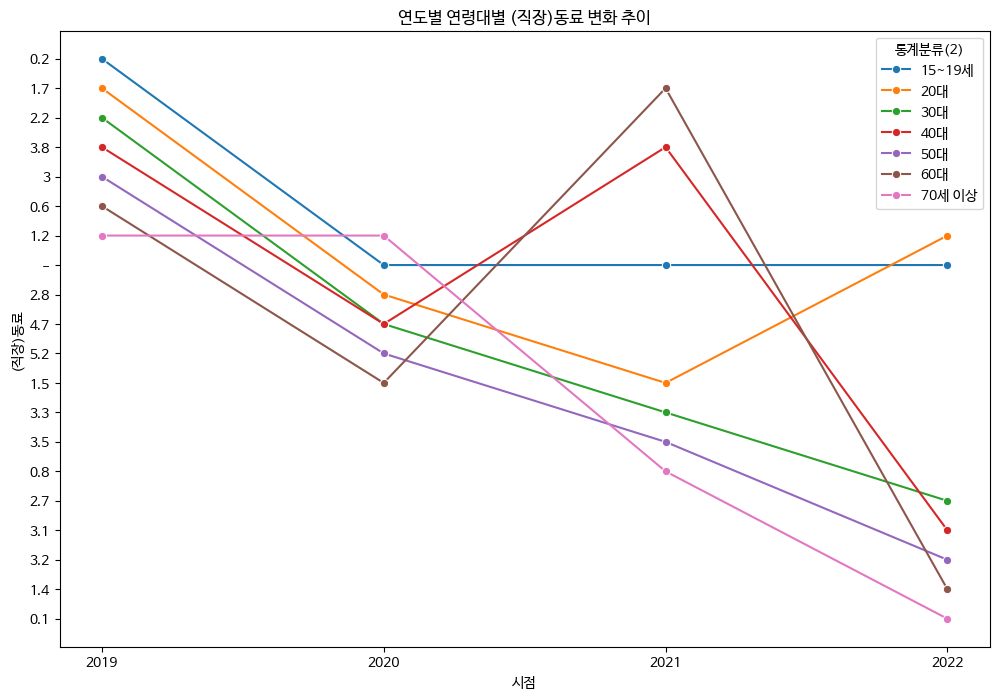

In [20]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_age, x='시점', y='(직장)동료', hue='통계분류(2)', marker='o')
plt.title('연도별 연령대별 (직장)동료 변화 추이')
plt.show()

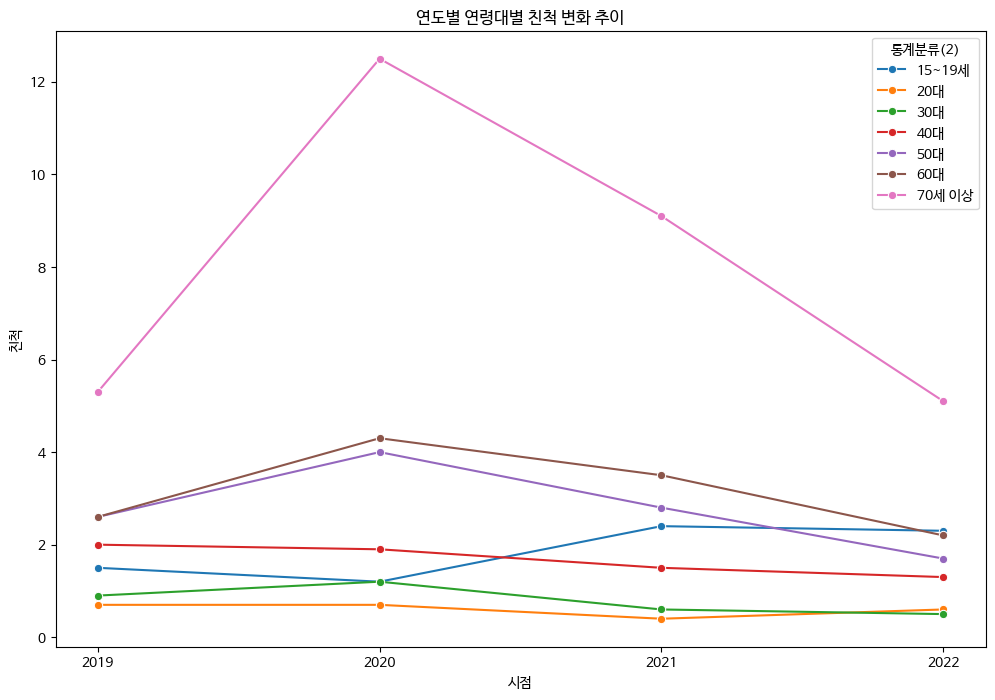

In [21]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_age, x='시점', y='친척', hue='통계분류(2)', marker='o')
plt.title('연도별 연령대별 친척 변화 추이')
plt.show()

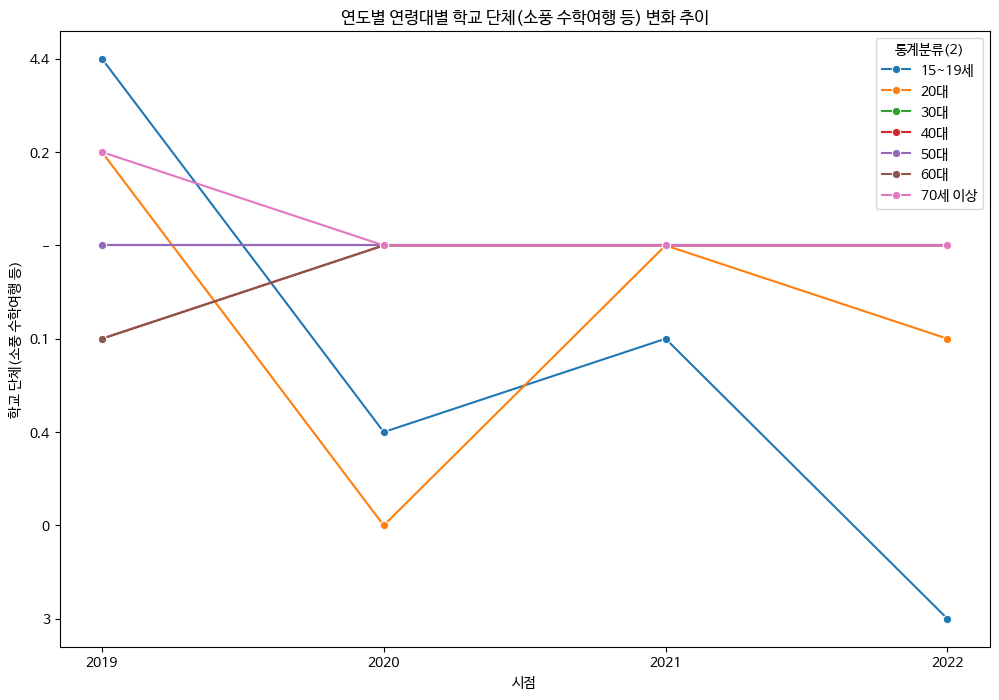

In [22]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_age, x='시점', y='학교 단체(소풍 수학여행 등)', hue='통계분류(2)', marker='o')
plt.title('연도별 연령대별 학교 단체(소풍 수학여행 등) 변화 추이')
plt.show()

### 직업별 동반자 유형 분석

In [23]:
df_job = df_oneday[df_oneday["통계분류(1)"]=="직업"]
df_job.columns

Index(['시점', '통계분류(1)', '통계분류(2)', '가족(부모 배우자 자녀 형제)', '친구/연인',
       '친목 단체/모임(동호회 종교단체 등)', '(직장)동료', '친척', '학교 단체(소풍 수학여행 등)', '기타'],
      dtype='object')

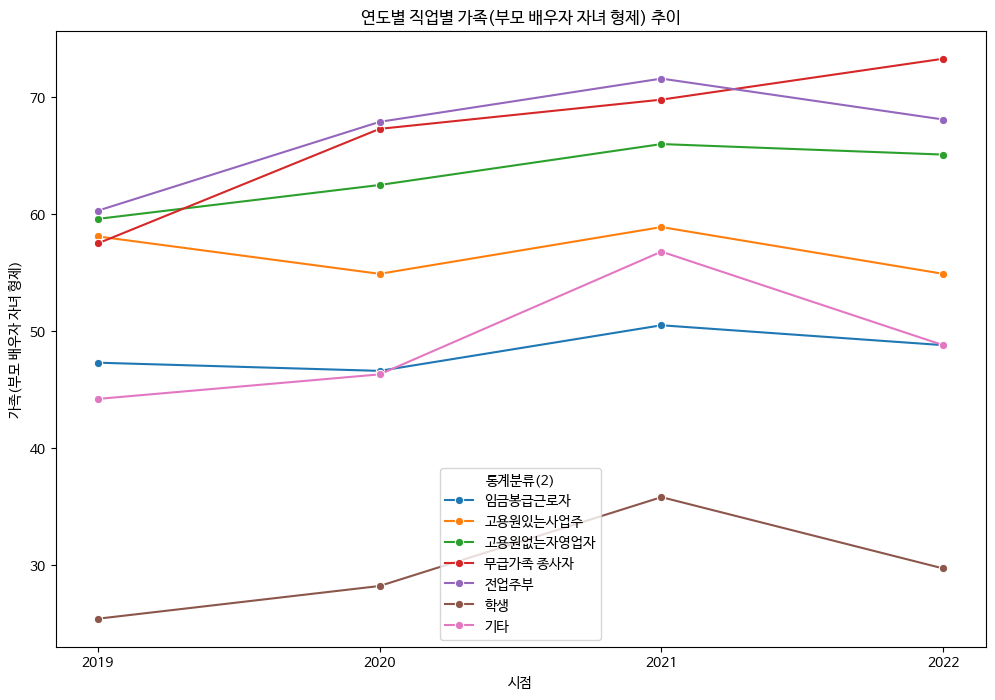

In [24]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_job, x='시점', y='가족(부모 배우자 자녀 형제)', hue='통계분류(2)', marker='o')
plt.title('연도별 직업별 가족(부모 배우자 자녀 형제) 추이')
plt.show()

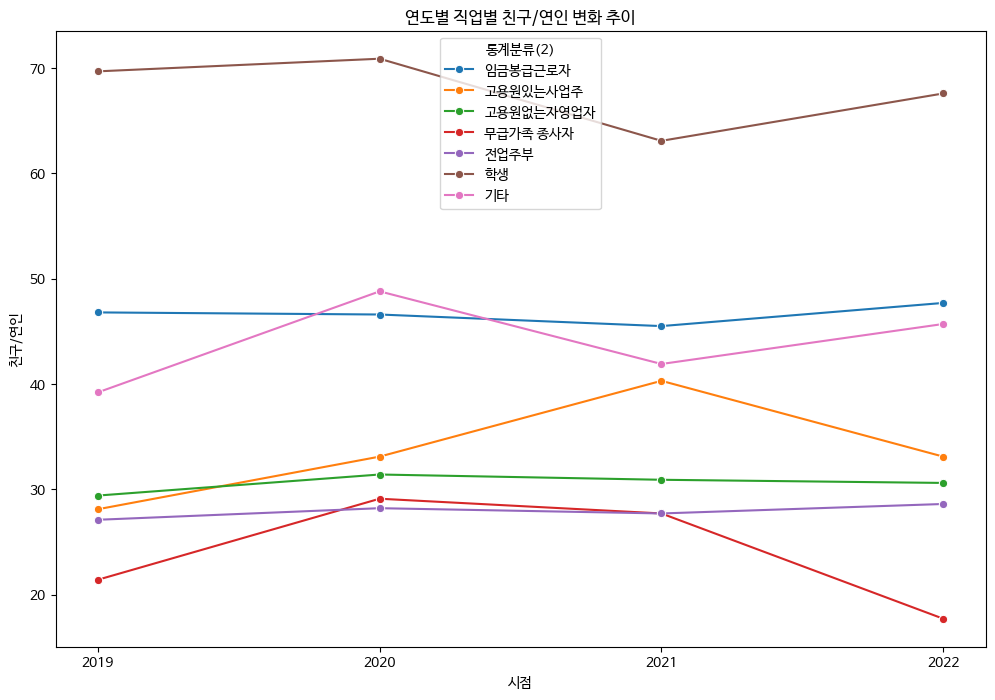

In [25]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_job, x='시점', y='친구/연인', hue='통계분류(2)', marker='o')
plt.title('연도별 직업별 친구/연인 변화 추이')
plt.show()

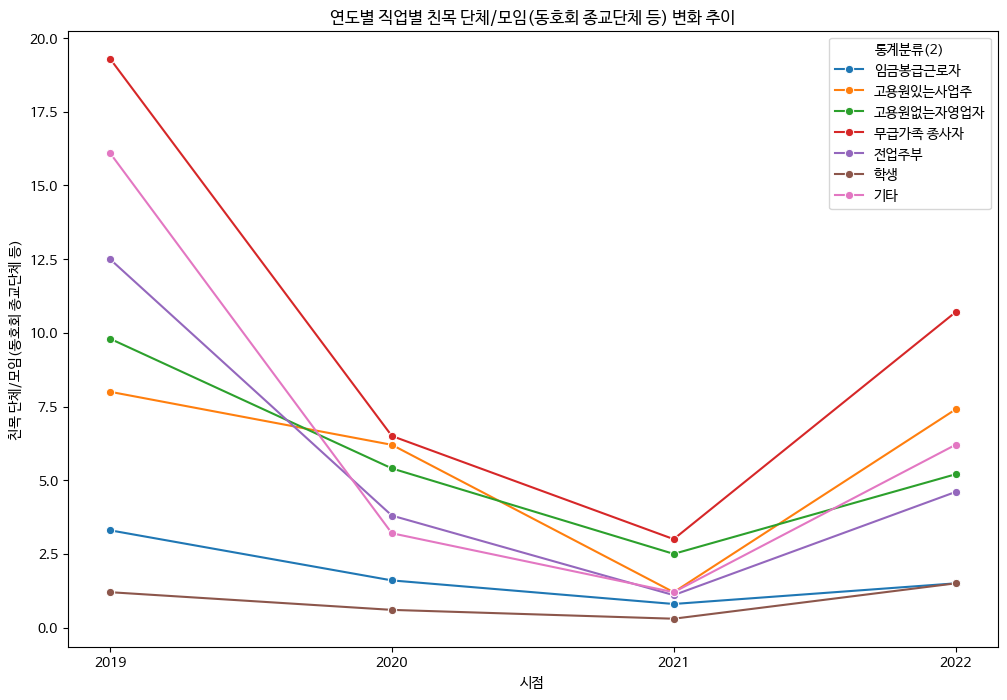

In [26]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_job, x='시점', y='친목 단체/모임(동호회 종교단체 등)', hue='통계분류(2)', marker='o')
plt.title('연도별 직업별 친목 단체/모임(동호회 종교단체 등) 변화 추이')
plt.show()

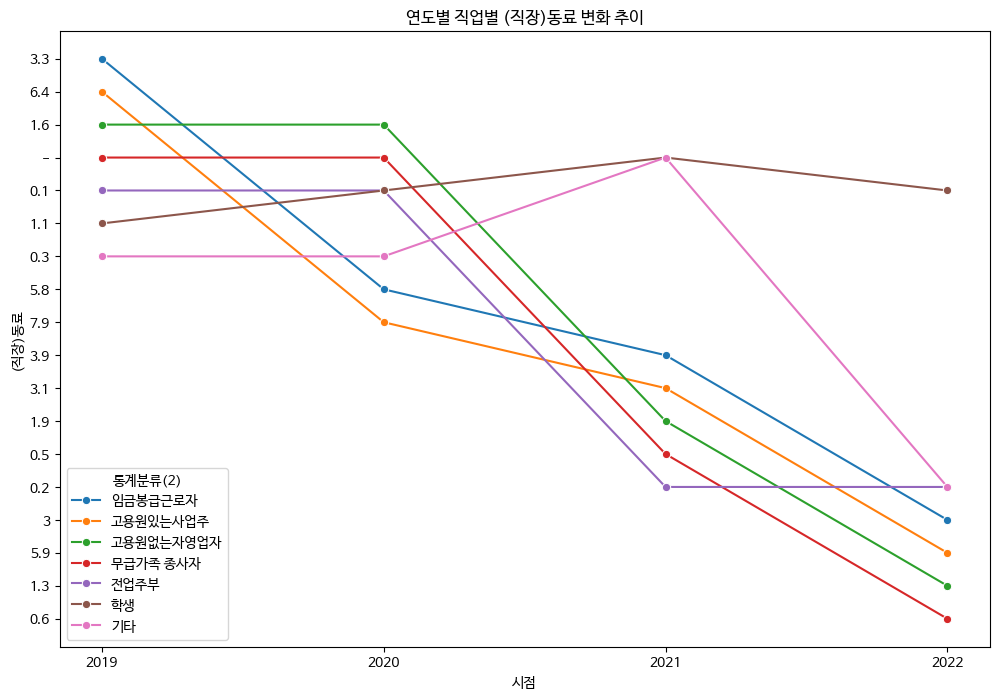

In [27]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_job, x='시점', y='(직장)동료', hue='통계분류(2)', marker='o')
plt.title('연도별 직업별 (직장)동료 변화 추이')
plt.show()

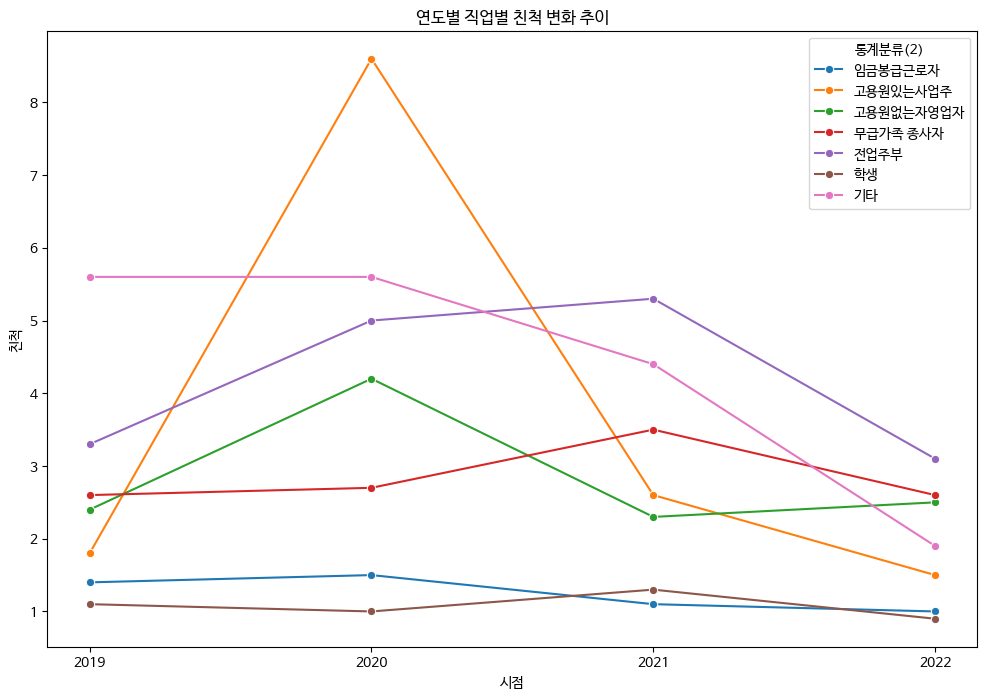

In [28]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_job, x='시점', y='친척', hue='통계분류(2)', marker='o')
plt.title('연도별 직업별 친척 변화 추이')
plt.show()

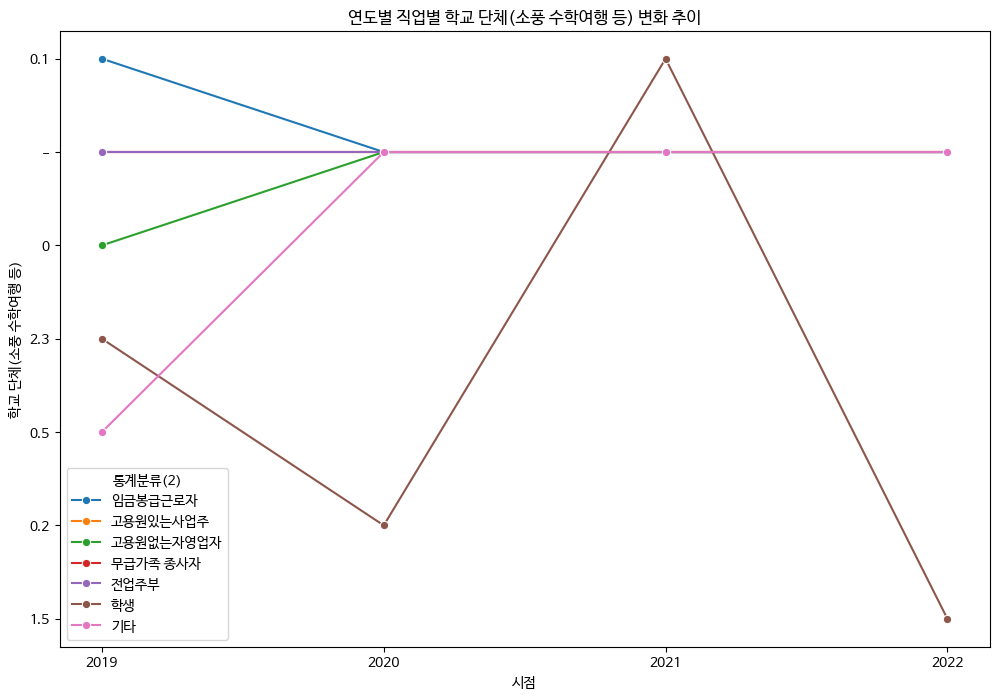

In [29]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_job, x='시점', y='학교 단체(소풍 수학여행 등)', hue='통계분류(2)', marker='o')
plt.title('연도별 직업별 학교 단체(소풍 수학여행 등) 변화 추이')
plt.show()

## 인사이트

- 선정 기준 : 
    + 마케팅 할 대상을 고려하였을때 절대적인 수치값이 높고 상승하는 추세인 값을 선정
- 성별
    + 친구/연인과 동반하는 여성이 가장 높은 수치를 나타내며 연도별로 상승하고 있는 상황으로 보아 마케팅 고려 대상이라고 판단됨.
- 연령대
    + 친구/연인과 동반하는 20대(1순위)가 가장 높은 수치 및 증가하는 상황을 보이고 있으며 가족과 동반하는 40대(2순위) 또한 상대적으로 높은 수치를 보이고 있음.
- 직업
    + 가족과 동반하는 무급가족 종사자(1순위)가 연도별로 꾸준한 증가폭 및 높은 수치를 기록하고 있으며 친구/연인과 동반하는 학생(2순위) 또한 마케팅 대상으로 고려됨.